In [10]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
# Target Account
target_user =["@BBCworld","@CNN", "@CBS", "@FoxNews", "@nytimes"] 
#BBC, CBS, CNN, Fox, and New York times

# Counter
counter = 1



tweetDict = {}
for user in target_user:
# Loop through 5 pages of tweets (total 100 tweets)
    tweetDict[user] = []
    for x in range(5):
        # Get all tweets from home feed
        Tweets = api.user_timeline(user,page=x+1)
        for tweet in Tweets:
            tweetDict[user].append(tweet['text'])
print(tweetDict)

{'@BBCworld': ['How a child rape became a religious flashpoint for India https://t.co/g4tnJ0dPBY', 'The battle of the gas-sucking mega giants is set to begin https://t.co/NVSw6XcaSK', 'Russia to showcase robot tank in WW2 victory parade https://t.co/Y1e4i2Ym5P', 'Cannes Film Festival 2018: 10 films to watch https://t.co/DcXJLKJQRB', 'Oliver North: NRA elects Reagan-era figure as president https://t.co/OOAlrwYQ7Q', 'Italy faces fresh elections as coalition talks fail https://t.co/4ovcJuXahJ', "Alabama 'miracle' boy awakes before doctors pull plug https://t.co/ncBjHQODVa", 'Syria war: Rebels leave last major besieged enclave https://t.co/AsVeSrEISW', "Melania Trump unveils 'Be Best' campaign https://t.co/Wytb5Ryq5n", 'Brazil First Lady Marcela Temer rescued dog from lake https://t.co/mp9mmbEJWh', 'Rwanda landslides after heavy rain bring 2018 death toll to 200 https://t.co/fEW8S1Nk1q', 'Afghanistan air strike: UN confirms 30 child deaths in April attack https://t.co/yZu2jyRssp', 'Kim Wal

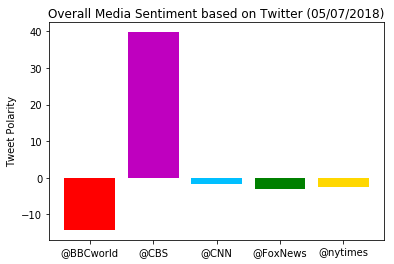

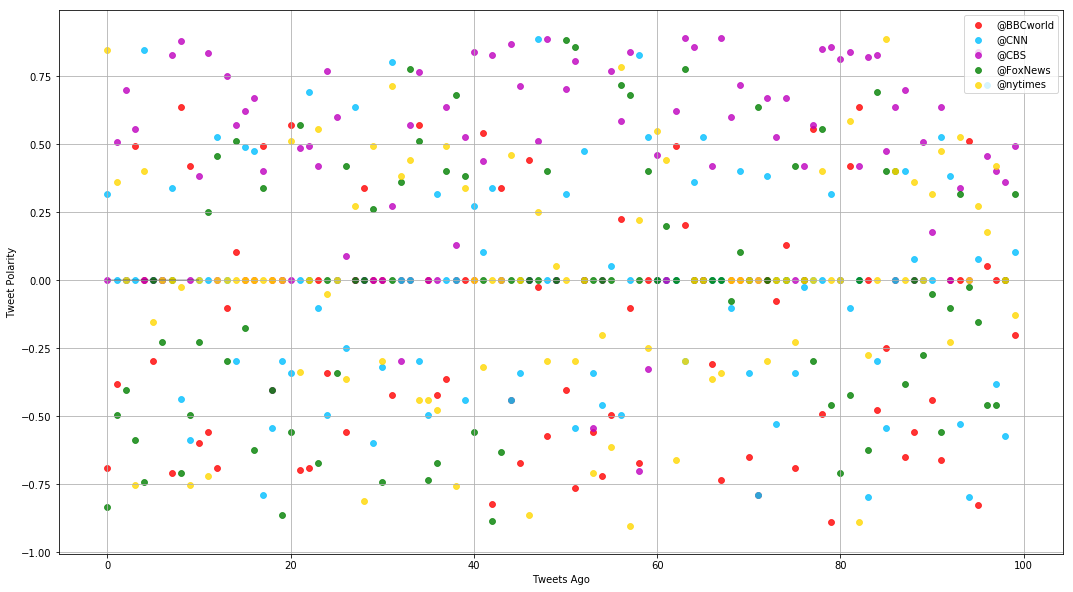

   Compound        Date  Negative  Neutral  Positive     Source  \
0   -0.6908  03/28/2018     0.630    0.370     0.000  @BBCworld   
1   -0.3818  03/28/2018     0.809    0.191     0.000  @BBCworld   
2    0.0000  03/28/2018     1.000    0.000     0.000  @BBCworld   
3    0.4939  03/28/2018     0.714    0.000     0.286  @BBCworld   
4    0.0000  03/28/2018     1.000    0.000     0.000  @BBCworld   

                                                Text  
0  How a child rape became a religious flashpoint...  
1  The battle of the gas-sucking mega giants is s...  
2  Russia to showcase robot tank in WW2 victory p...  
3  Cannes Film Festival 2018: 10 films to watch h...  
4  Oliver North: NRA elects Reagan-era figure as ...  


In [12]:
# Variables for holding sentiments
sentiments = {}
Numbers=[]
for k in tweetDict:
    public_tweets = tweetDict[k]
    sentiments[k] = []
  
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet)["compound"]
        pos = analyzer.polarity_scores(tweet)["pos"]
        neu = analyzer.polarity_scores(tweet)["neu"]
        neg = analyzer.polarity_scores(tweet)["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments[k].append({"Source": k,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Date": "03/28/2018",
                               "Text": tweet})
        
color = ['r', 'deepskyblue', 'm', 'g','gold']
i = 0
fig = plt.figure(figsize=(18,10))
listPD = []
for k in sentiments:
    A=0
    # Convert sentiments to DataFrame
    sentiments_pd = pd.DataFrame.from_dict(sentiments[k])
    listPD.append(sentiments_pd)
            
    
    A=sentiments_pd['Compound'].sum()
    Numbers.append(A)
    #print(k)
    #print(sentiments_pd.head())

    # Create plot
    plt.scatter(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], color=color[i], marker="o", linewidth=0.8,
         alpha=0.8, label=k)
    i += 1
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend()
plt.grid()
plt.hlines(0, 0, 10, alpha=0.25)

plt.savefig("Twitter.png")    
plt.show()

sentiments_pd_all = pd.concat(listPD)
sentiments_pd_all.to_csv('./sentiments.csv',sep=',')
print(sentiments_pd_all.head())

 

In [13]:
plt.bar(target_user, Numbers,color=color)
plt.title('Overall Media Sentiment based on Twitter (05/07/2018)')
plt.ylabel("Tweet Polarity")
plt.savefig('Twitter2.png')

In [ ]:
# Observations
#1- BBC are mostly reporting on Negative news stories
#2- CBS is mostly reporting positive stories
#3- CNN is in the neutral zone when it comes to news reports
#4- Fox News and New York Times are slightly negative, but they could have been only for one day (since the data is for the last 100 tweets)